In [ ]:
# 설치된 패키지 알아보기
!pip list


Package                       Version
----------------------------- ----------------------
absl-py                       1.2.0
aiohttp                       3.8.1
aiosignal                     1.2.0
alabaster                     0.7.12
albumentations                1.2.1
altair                        4.2.0
appdirs                       1.4.4
arviz                         0.12.1
astor                         0.8.1
astropy                       4.3.1
astunparse                    1.6.3
async-timeout                 4.0.2
asynctest                     0.13.0
atari-py                      0.2.9
atomicwrites                  1.4.1
attrs                         22.1.0
audioread                     3.0.0
autograd                      1.4
Babel                         2.10.3
backcall                      0.2.0
beautifulsoup4                4.6.3
bleach                        5.0.1
blis                          0.7.8
bokeh                         2.3.3
branca                        0.5.0
bs4   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    object 
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 83.7+ KB


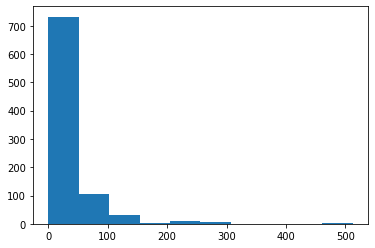

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


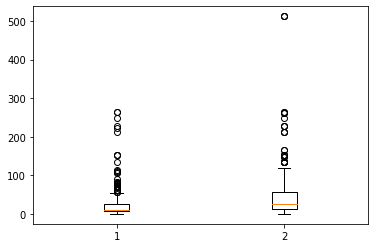

Sex
female    314
male      577
dtype: int64
Survived
0     81
1    233
dtype: int64
Survived
0    468
1    109
dtype: int64


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

df['Survived'] = df['Survived'].astype(str)
df['Pclass'] = df['Pclass'].astype(str)

df.head(10)
df.info() # entries가 모두 non-null이 아니면 null 값이 존재한다는 뜻
df.describe(include='all') #모든 기술통계 보기

grouped = df.groupby('Pclass')
grouped.size()

plt.hist(df['Fare'])
plt.show()

data_0 = df[df['Survived']=="0"]['Fare']
data_1 = df[df['Survived']=="1"]['Fare']

fig, ax = plt.subplots()
ax.boxplot([data_0, data_1])
plt.show()

# Sex변수 분석
grouped = df.groupby('Sex')
print(grouped.size())

data_0 = df[df['Sex']=="female"]["Survived"]
grouped = pd.DataFrame(data_0).groupby("Survived")
print(grouped.size())

data_1 = df[df['Sex']=="male"]["Survived"]
grouped = pd.DataFrame(data_1).groupby("Survived")
print(grouped.size())

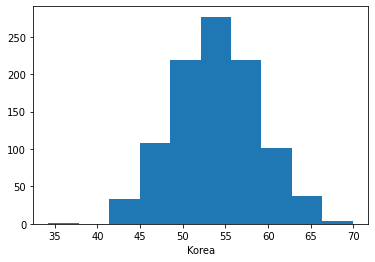

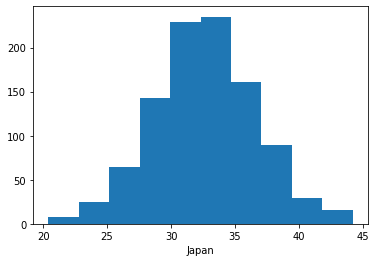

,한국인,일본인,한국인_정규화,일본인_정규화,한국인_정규화2,한국인_정규화3,일본인_정규화3,한국인_mm,일본인_mm,한국인_mm2
0,61.118021,33.597163,1.468562,0.237437,1.468562,1.468562,0.237437,0.753175,0.554076,0.753175
1,50.557085,28.238303,-0.674678,-1.101505,-0.674678,-0.674678,-1.101505,0.456955,0.328785,0.456955
2,51.880459,35.385882,-0.406112,0.684359,-0.406112,-0.406112,0.684359,0.494074,0.629275,0.494074
3,54.781034,27.539731,0.182532,-1.276047,0.182532,0.182532,-1.276047,0.575431,0.299417,0.575431
4,52.330081,29.712615,-0.314865,-0.733140,-0.314865,-0.314865,-0.733140,0.506685,0.390767,0.506685


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

meat_consumption_korean = 5*np.random.randn(1000) + 53.9
meat_consumption_japan = 4*np.random.randn(1000) + 32.7

meat_consumption = pd.DataFrame({"한국인":meat_consumption_korean,"일본인":meat_consumption_japan})
meat_consumption.head(6)

#hist(x, bins = 10, range = [-10,10], label = "title") #bins : 지정한 수의 칸으로 나눔
plt.hist(meat_consumption_korean)
plt.xlabel('Korea')
plt.show()

plt.hist(meat_consumption_japan)
plt.xlabel('Japan')
plt.show()

# 정규화
#1번 방법 - scipy.stats
import scipy.stats as ss
meat_consumption["한국인_정규화"] = ss.zscore(meat_consumption_korean) # Z스코어 생성
meat_consumption["일본인_정규화"] = ss.zscore(meat_consumption_japan)
meat_consumption.head()

#2번 방법 - numpy 계산
meat_consumption["한국인_정규화2"] = (meat_consumption_korean - np.mean(meat_consumption_korean)) / np.std(meat_consumption_korean)

#3번 방법 - sklearn - StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
meat_consumption["한국인_정규화3"] = scaler.fit_transform(meat_consumption[["한국인"]])
meat_consumption["일본인_정규화3"] = scaler.fit_transform(meat_consumption[["일본인"]])
meat_consumption.head()

#Min-Max 정규화
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
meat_consumption["한국인_mm"] = scaler.fit_transform(meat_consumption[["한국인"]])
meat_consumption["일본인_mm"] = scaler.fit_transform(meat_consumption[["일본인"]])
meat_consumption.head()

Min = np.min(meat_consumption_korean)
Max = np.max(meat_consumption_korean)
meat_consumption["한국인_mm2"] = (meat_consumption[["한국인"]] - Min) / (Max - Min)
meat_consumption.head()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as ss
# from google.colab import drive
# drive.mount('/content/drive')

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/빅데이터분석기사예제/USJudgeRatings.csv")
print(ss.skew(df["CONT"]))
print(ss.skew(df["PHYS"]))
df.head()

df['CONT1'] = np.log(df['CONT']) #양수 로그변환
df['PHYS1'] = np.log(np.max(df['PHYS'] + 1) - df['PHYS']) #음수 로그변환
print(ss.skew(df["CONT1"]))
print(ss.skew(df["PHYS1"]))

df['CONT2'] = np.log10(df['CONT']) #양수 로그10 변환
df['PHYS2'] = np.log10(np.max(df['PHYS'] + 1) - df['PHYS']) #음수 로그10 변환


1.0859724796276253
-1.5582154642293153
0.6555571886692603
0.5824357748750443


73.5


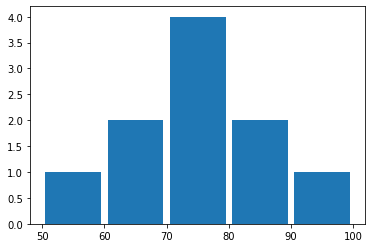

,이름,수학점수,등급,등급_cut,등급_qcut
0,철수,52,F,F,F
1,영희,92,A,A,A
2,미영,84,B,B,A
3,시완,71,C,C,D
4,미경,65,D,D,F
5,영환,81,B,B,B
6,숙경,66,D,D,D
7,부영,77,C,C,B
8,민섭,73,C,C,C
9,보연,74,C,C,C


In [ ]:
#범주화, 이산형화
data = [["철수",52],["영희",92],["미영",84],["시완",71],["미경",65],["영환",81],["숙경",66],["부영",77],["민섭",73],["보연",74]]
df = pd.DataFrame(data, columns = ['이름','수학점수'])
print(np.mean(df['수학점수']))

plt.hist(df['수학점수'], bins = 5, range=[50,100],rwidth=0.9) # bins - 막대 수, rwidth - 막대굵기
plt.show()

df['등급']=0
df.loc[(df['수학점수']<60), '등급'] = "F" # A.loc[(조건), 칼럼] = "반환값"
df.loc[(df['수학점수']>=60) & (df['수학점수']<70), '등급'] = "D"
df.loc[(df['수학점수']>=70) & (df['수학점수']<80), '등급'] = "C"
df.loc[(df['수학점수']>=80) & (df['수학점수']<90), '등급'] = "B"
df.loc[(df['수학점수']>=90) & (df['수학점수']<=100), '등급'] = "A"

df['등급_cut'] = pd.cut(x=df['수학점수'], bins=[0,60,70,80,90,100], labels=["F","D","C","B","A"], include_lowest=True)
#x - 데이터, bins - 경계값리스트,labels - bins이름, include_lowest=True - 각 구간 가장 낮은 경계값 포함

df['등급_qcut'] = pd.qcut(x=df['수학점수'], q=5, labels=["F","D","C","B","A"])
#F,D,C,B,A 5개(q) 각각 균일하게 갯수 분포
df


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

iris=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/빅데이터분석기사예제/iris.csv")

#연속형 변수와 범주형 변수 분리
df = iris.drop(["species"], axis=1)
df_species = iris["species"]

# 변수 정규화
from sklearn.preprocessing import StandardScaler
df['sepal_length'] = StandardScaler().fit_transform(df[['sepal_length']])
df['sepal_width'] = StandardScaler().fit_transform(df[['sepal_width']])
df['petal_length'] = StandardScaler().fit_transform(df[['petal_length']])
df['petal_width'] = StandardScaler().fit_transform(df[['petal_width']])
# PCA 수행
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
p_score = pca.fit_transform(df)
print(p_score.shape)
print(pca.explained_variance_ratio_)


(150, 4)
[0.72962445 0.22850762 0.03668922 0.00517871]


In [ ]:
#결측 확인
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/빅데이터분석기사예제/titanic.csv")
df.isnull() # 결측인 경우 True 반환
# print(df.isnull().sum())
# print(df.info())

df_1 = df.dropna(axis=0) # 결측 있는 행 제거, 열 제거는 axis=1, df.dropna(subset=["Age"],axis=0) - Age열 결측 행 모두 제거
# print(df_1.isnull().sum().sum()) # 전체 결측치
# df_1.shape

# 결측치에 평균 대입
# print(df['Age'].isnull().sum())
# age_mean=df['Age'].mean()
# df['Age'].fillna(age_mean, inplace=True) # fillna() - 결측에 데이터 채워넣기
# print(df['Age'].isnull().sum())

# 결측치에 최빈값 대입
# from scipy.stats import mode
# print(df['Embarked'].isnull().sum())
# embarked_mode=df['Embarked'].mode()
# df['Embarked'].fillna(embarked_mode[0],inplace=True)
# print(df['Embarked'].isnull().sum())

# 결측치에 인접한 값 대입
df["Embarked"].fillna(method='ffill', inplace=True) # fillna(method='ffill')

# 결측치를 그룹별 평균값으로 대체
# print(df.groupby('Sex')['Age'].mean())
# print(df.groupby('Pclass')['Age'].mean())
# df["Age"].fillna(df.groupby("Pclass")["Age"].transform('mean'),inplace=True)
# df.tail()

NameError: ignored

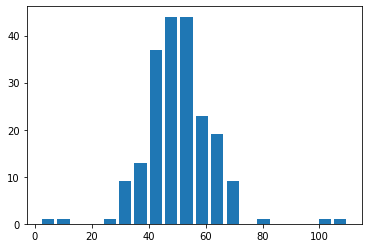

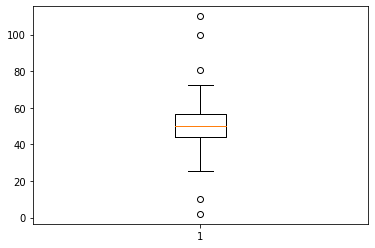

Q1 =  43.87222703021136
Q2 =  50.052418607326004
Q3 =  56.580727142538464
IQR =  12.708500112327101
              값
142   80.708626
202  100.000000
204  110.000000
        값
201   2.0
203  10.0


In [ ]:
# 이상치 처리

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = 10*np.random.randn(200) + 50
df=pd.DataFrame({"값":data})

# 임의의 이상치 삽입
df.loc[201]=2
df.loc[202]=100
df.loc[203]=10
df.loc[204]=110

#시각화
plt.hist(df["값"],bins=20,rwidth=0.8)
plt.show()
plt.boxplot(df["값"])
plt.show()

# #IQR(사분위)
# Q1 = df["값"].qunatile(.25) #1사분위수
# Q2 = df["값"].qunatile(.5) #2사분위수
# Q3 = df["값"].qunatile(.75) #3사분위수
# IQR = Q3 - Q1 #사분위범위

# print("Q1 = ", Q1)
# print("Q2 = ", Q2)
# print("Q3 = ", Q3)
# print("IQR = ", IQR)

Q1 = df["값"].describe()["25%"] #1사분위수
Q2 = df["값"].describe()["50%"] #2사분위수
Q3 = df["값"].describe()["75%"] #3사분위수
IQR = Q3 - Q1 #사분위범위

print("Q1 = ", Q1)
print("Q2 = ", Q2)
print("Q3 = ", Q3)
print("IQR = ", IQR)

# IQR에 따른 이상치 검출
condition = df["값"] > (Q3 + IQR * 1.5)
upperOutlier = df[condition]
condition = df["값"] < (Q1 - IQR * 1.5)
lowerOutlier = df[condition]

print(upperOutlier)
print(lowerOutlier)

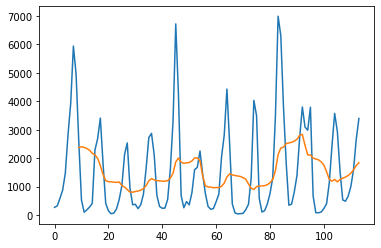

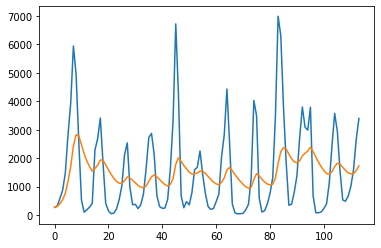

In [20]:
#평활화(Smoothing)

# from google.colab import drive
# drive.mount('/content/drive')

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/빅데이터분석기사예제/lynx.csv")
df.head(10)
df.describe()

# 단순이동평균 .rolling(n).mean() - n년
df["sma"] = df["value"].rolling(10).mean()

plt.plot(df["value"])
plt.plot(df["sma"])
plt.show()

# 지수가중이동평균 .ewm(n).mean() - n년
df["ewm"] = df["value"].ewm(10).mean()
plt.plot(df["value"])
plt.plot(df["ewm"])
plt.show()
